# Downsampling and Upsampling with Filtering using the Window Design Method

Implemented Downsampling and Upsampling of an Audio File including LP Filtering with a filter designed using the Window Method.

Run the cell below to import the required libraries. (If necessary install missing Python Packages beforehand.)

In [ ]:
# Imports
import numpy as np
import scipy.signal as sp
import librosa
import librosa.display
import IPython.display as ipd
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [ ]:
# Sampling is done at 48000 Hz or 2*np.pi

#So Downsampled by factor 6 will  means new sampling rate at  48000/6 = 8000 or 2*np.pi/6 = 1.0471

#We need to design passband  filter such that it passes all frequeencies below 4000Hz or 0.5235987755982988

#window=signal.windows.get_window(('kaiser',14), 50, fftbins=True)
#freqz(window)





Run the next cell to view the Spectrogram of the Original Audio File.

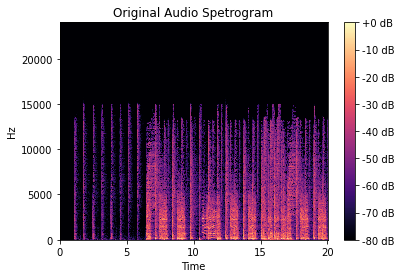

In [ ]:
D = librosa.stft(audio) 
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax, sr=sr)
ax.set(title='Original Audio Spetrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB");

In the next cells you need to complete the function so it takes as a paramenter the Downsampling/Upsampling Factor `N` and returns the Filter Coefficients `hfilt`  for a Low Pass Filter to be used in the Downsampling/Upsampling sections.
 - Used the Window Method to design the filter.
 - Used the function `signal.windows.get_window` from SciPy.
 - The minimum design requirements are detailed in the Frequency Response below. Your filter must match the required Frequency Response or needs to be better than it. Better means: smaller transition band and/or higher attenuation in the stop band.

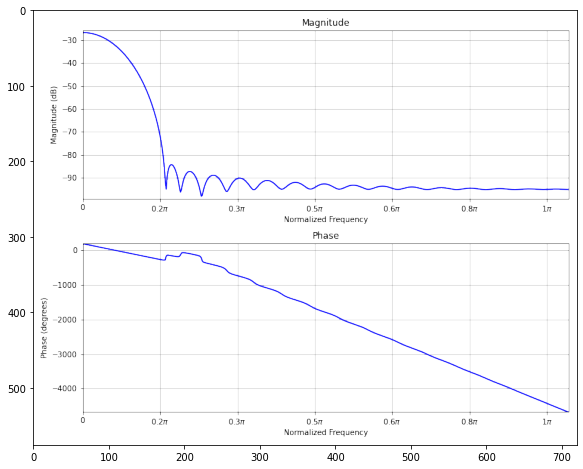

In [ ]:
plt.figure(figsize = (10,8))
plt.imshow(plt.imread('./images/lp%s.png'%N));

In [ ]:
def filter_window_method(N):
    """
    A Function that returns filter coefficients to be used in down/upsampling tasks according \
    to the factor N designed using the Window Method.
    
    Parameters:
    -----------
    N : int
        The down/upsampling factor.
    
    Returns:
    --------
    hfilt : numpy array
            An array containing the filter coefficients designed using the Window Method.
    """
    
    
    #Looking at the Kaiser window with β=8 , length = 16 , we see that we get -60 dB at a normalized frequency of about 0.36. 
    #the main lobe of this length 32 window (up to about 0.17) is about half as wide as the main lobe at length 16!
    


    wc = (((1/N)-0.17)*np.pi)

    
    n = np.arange(32)
    h = np.sin(wc*(n-15.5))/(np.pi*(n-15.5))
    hk = sp.windows.get_window(('kaiser',8), 32, fftbins=True)
    
    hfilt= hk*h


    return hfilt
    

Compare the frequency response of your filter with the minimum requirements.

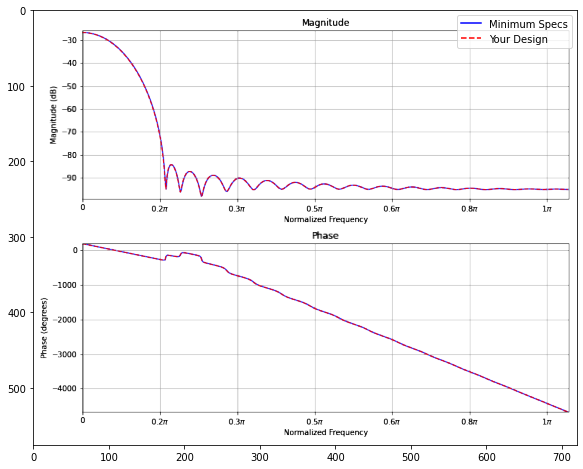

In [ ]:
def freqz(x):
    f, H = signal.freqz(x)
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!
    # open figure
    fig, ax = plt.subplots(figsize=(10,8))
    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'r--')
    plt.axis([0,np.pi,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Magnitude (dB)')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
    ))
    ax.xaxis.set_major_locator(MultipleLocator(base=0.5))
    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'r--')
    plt.axis([0,np.pi,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Phase (degrees)')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
    ))
    ax.xaxis.set_major_locator(MultipleLocator(base=0.5))
    plt.tight_layout()
    plt.savefig('./images/out_lp.png', transparent=True )
    plt.close()
    
h = filter_window_method(N)
freqz(h)

plt.figure(figsize = (10,8))
plt.imshow(plt.imread('./images/lp%s.png'%N))
plt.imshow(plt.imread('./images/out_lp.png'))
plt.plot(0,0,'b',label='Minimum Specs')
plt.plot(0,0,'r--',label='Your Design')
plt.legend();

Now you need to implement a `downsampling` function that takes as parameters an array with audio data, the sampling frequency of the audio data, and the downsampling factor N.
-  Used the filter that you designed before `filter_window_method`.
The function must return an array with the downsampled audio and the new sampling frequency.

In [ ]:
def downsampling(audio, fs, N):
    """
    Function to perform downsampling with filtering of an audio input file by a factor N.
    
    Paramters:
    ----------
    audio : numpy array
            A numpy array with audio data, mono.
    fs : int
        The sampling frequency of the audio data.
    N : int
        The downsampling factor.
    
    Returns:
    audio_down : numpy array
                A numpy array with the downsampled audio data.
    fs_down : int
              The new sampling frequency after downsampling
    """
    import scipy.signal
    import numpy as np
    
    # YOUR CODE HERE
    
    hfilter = filter_window_method(N)
    
    audio_filter = sp.lfilter(hfilter, 1, audio)
    
    audio_down = audio_filter[::N]
    
    
    
    
    
    #audio_down = audio[::N]
    
    fs_down = fs / N
    
    # End Your Code here
    return audio_down, fs_down

Run the next cell to listen to the downsampled version of the audio.

In [ ]:
audio_down, fs_down = downsampling(audio, sr, N)
print(f"Audio data shape: {audio_down.shape}")
print(f"Sampling frequency: {fs_down}")
print(f"Factor: {round(audio.shape[0]/audio_down.shape[0])}")
display(ipd.Audio(audio_down,rate=fs_down))

Audio data shape: (160001,)
Sampling frequency: 8000.0
Factor: 6


Run next cell to see a Spectrogram of the downsampled version of the Audio.

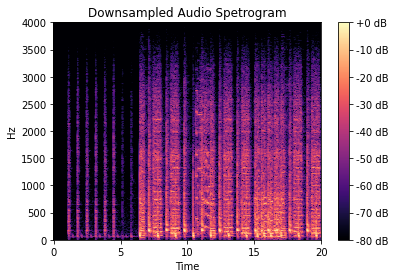

In [ ]:
D = librosa.stft(audio_down, hop_length=256, n_fft=2048)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax, sr=fs_down, hop_length=256)
ax.set(title='Downsampled Audio Spetrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB");

Now you need to implement a `upsampling` function that takes as parameters an array with audio data, the sampling frequency of the audio data, and the downsampling factor N.
-  Used the filter that you designed before `filter_window_method`.
The function must return an array with the upsampled audio and the new sampling frequency.

In [ ]:
def upsampling(audio, fs, N):
    """
    Function to perform upsampling with filtering of an audio input file by a factor N.
    
    Paramters:
    ----------
    audio : numpy array
            A numpy array with audio data, mono.
    fs : int
        The sampling frequency of the audio data.
    N : int
        The upsampling factor.
    
    Returns:
    audio_up : numpy array
                A numpy array with the upsampled audio data.
    fs_up : int
              The new sampling frequency after upsampling
    """

    L = len(audio)
    
    audio_up = np.zeros(N * L)
    
    audio_up[::N] = audio
    
    fs_up = fs * N
    
    hfilt=filter_window_method(N)
    
    audio_up = sp.lfilter(hfilt, 1, audio_up)

    return audio_up, fs_up

Run the next cell to listen to the downsampled version of the audio.

In [ ]:
audio_up, fs_up = upsampling(audio_down, fs_down, N)
print(f"Audio data shape: {audio_up.shape}")
print(f"Sampling frequency: {fs_up}")
print(f"Factor: {round(audio_up.shape[0]/audio_down.shape[0])}")
display(ipd.Audio(audio_up,rate=fs_up))

Audio data shape: (960006,)
Sampling frequency: 48000.0
Factor: 6


Run next cell to see a Spectrogram of the Original Audio and the Upsampled version of the audio.

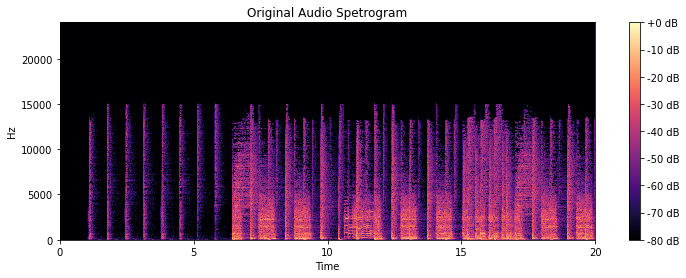

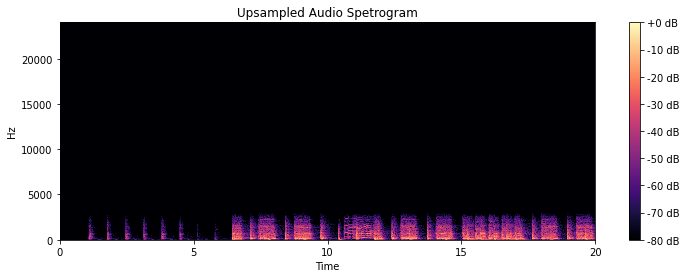

In [ ]:
D1 = librosa.stft(audio)
S_db1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)
fig1, ax1= plt.subplots(figsize=(12,4))
img1 = librosa.display.specshow(S_db1, x_axis='time', y_axis='linear', ax=ax1, sr=sr)
ax1.set(title='Original Audio Spetrogram')
fig1.colorbar(img1, ax=ax1, format="%+2.f dB");
fig2, ax2 = plt.subplots(figsize=(12,4))
D2 = librosa.stft(audio_up)  # STFT of y
S_db2 = librosa.amplitude_to_db(np.abs(D2), ref=np.max)
img2 = librosa.display.specshow(S_db2, x_axis='time', y_axis='linear', ax=ax2, sr=fs_up)
ax2.set(title='Upsampled Audio Spetrogram')
fig2.colorbar(img1, ax=ax2, format="%+2.f dB");